https://machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/

In [12]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
# fix random seed for reproducibility
numpy.random.seed(7)

In [2]:
passenger = pd.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3, sep=';')

In [3]:
passenger.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121


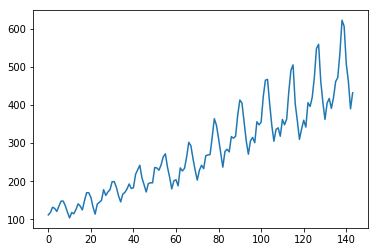

In [4]:
plt.plot(passenger)

In [5]:
# Split traint / test
s = int(len(passenger) * .67)
train, test = passenger.iloc[:s, :], passenger.iloc[s:len(passenger), :]
len(train), len(test)

(96, 48)

In [6]:
def create_dataset(dataset, look_back=1):
    x, y = [], []
    for i in range(len(dataset) - look_back - 1):
        x.append(dataset.iloc[i:(i + look_back), 0].tolist())
        y.append(dataset.iloc[i + look_back, 0])
    return numpy.array(x), numpy.array(y)

In [7]:
look_back = 1
x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

In [8]:
model=Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
 - 0s - loss: 47524.7768
Epoch 2/200
 - 0s - loss: 41628.2370
Epoch 3/200
 - 0s - loss: 35681.0791
Epoch 4/200
 - 0s - loss: 29477.7606
Epoch 5/200
 - 0s - loss: 23399.4548
Epoch 6/200
 - 0s - loss: 17705.1303
Epoch 7/200
 - 0s - loss: 12763.1476
Epoch 8/200
 - 0s - loss: 8670.5047
Epoch 9/200
 - 0s - loss: 5578.7538
Epoch 10/200
 - 0s - loss: 3427.9433
Epoch 11/200
 - 0s - loss: 2063.9963
Epoch 12/200
 - 0s - loss: 1287.7405
Epoch 13/200
 - 0s - loss: 866.0605
Epoch 14/200
 - 0s - loss: 674.5012
Epoch 15/200
 - 0s - loss: 584.9394
Epoch 16/200
 - 0s - loss: 555.0357
Epoch 17/200
 - 0s - loss: 546.6805
Epoch 18/200
 - 0s - loss: 547.3860
Epoch 19/200
 - 0s - loss: 538.8328
Epoch 20/200
 - 0s - loss: 538.5322
Epoch 21/200
 - 0s - loss: 536.9803
Epoch 22/200
 - 0s - loss: 536.0267
Epoch 23/200
 - 0s - loss: 537.1226
Epoch 24/200
 - 0s - loss: 535.7816
Epoch 25/200
 - 0s - loss: 538.2082
Epoch 26/200
 - 0s - loss: 538.4703
Epoch 27/200
 - 0s - loss: 538.2274
Epoch 28/200
 - 0s

In [9]:
# Estimate model performance
trainScore = model.evaluate(x_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(x_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 531.71 MSE (23.06 RMSE)
Test Score: 2355.06 MSE (48.53 RMSE)


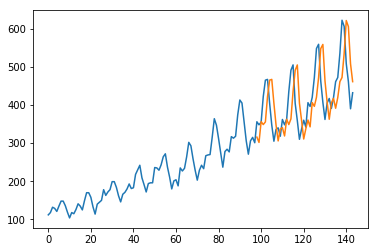

In [24]:
y_pred = model.predict(x_test)
passenger_pred = np.empty_like(passenger, dtype=float)
passenger_pred[:, :] = np.nan
passenger_pred[(s + 2):len(passenger), :] = y_pred
plt.plot(passenger)
plt.plot(passenger_pred)